In [18]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import math


import plotly.express as px # plot map

In [28]:
poli = pd.read_csv("police_fatalities.csv") # read csv file from the same folder
poli.head() # See the first 5 rows

,Unique ID,Subject's name,Subject's age,Subject's gender,Subject's race,Subject's race with imputations,Imputation probability,URL of image of deceased,Date of injury resulting in death (month/day/year),Location of injury (address),...,A brief description of the circumstances surrounding the death,"Dispositions/Exclusions INTERNAL USE, NOT FOR ANALYSIS",Intentional Use of Force (Developing),Link to news article or photo of official document,"Symptoms of mental illness? INTERNAL USE, NOT FOR ANALYSIS",Video,Date&Description,Unique ID formula,Unique identifier (redundant),Date (Year)
0,25746,Samuel H. Knapp,17,Male,European-American/White,European-American/White,not imputed,NaN,01/01/2000,27898-27804 US-101,...,Samuel Knapp was allegedly driving a stolen ve...,Unreported,Vehicle/Pursuit,https://drive.google.com/file/d/10DisrV8K5ReP1...,No,NaN,1/1/2000: Samuel Knapp was allegedly driving a...,NaN,25746.0,2000.0
1,25747,Mark A. Horton,21,Male,African-American/Black,African-American/Black,not imputed,NaN,01/01/2000,Davison Freeway,...,Two Detroit men killed when their car crashed ...,Unreported,Vehicle/Pursuit,https://drive.google.com/file/d/1-nK-RohgiM-tZ...,No,NaN,1/1/2000: Two Detroit men killed when their ca...,NaN,25747.0,2000.0
2,25748,Phillip A. Blurbridge,19,Male,African-American/Black,African-American/Black,not imputed,NaN,01/01/2000,Davison Freeway,...,Two Detroit men killed when their car crashed ...,Unreported,Vehicle/Pursuit,https://drive.google.com/file/d/1-nK-RohgiM-tZ...,No,NaN,1/1/2000: Two Detroit men killed when their ca...,NaN,25748.0,2000.0
3,25749,Mark Ortiz,23,Male,Hispanic/Latino,Hispanic/Latino,not imputed,NaN,01/01/2000,600 W Cherry Ln,...,A motorcycle was allegedly being driven errati...,Unreported,Vehicle/Pursuit,https://drive.google.com/file/d/1qAEefRjX_aTtC...,No,NaN,1/1/2000: A motorcycle was allegedly being dri...,NaN,25749.0,2000.0
4,2,Lester Miller,53,Male,Race unspecified,African-American/Black,0.947676492,NaN,01/02/2000,4850 Flakes Mill Road,...,"Darren Mayfield, a DeKalb County sheriff's dep...",Criminal,"Intentional Use of Force, Deadly",https://docs.google.com/document/d/1-YuShSarW_...,No,NaN,"1/2/2000: Darren Mayfield, a DeKalb County she...",NaN,2.0,2000.0


In [29]:
poli.shape

(28335, 29)

In [30]:
poli.dtypes

Unique ID                                                          object
Subject's name                                                     object
Subject's age                                                      object
Subject's gender                                                   object
Subject's race                                                     object
Subject's race with imputations                                    object
Imputation probability                                             object
URL of image of deceased                                           object
Date of injury resulting in death (month/day/year)                 object
Location of injury (address)                                       object
Location of death (city)                                           object
Location of death (state)                                          object
Location of death (zip code)                                      float64
Location of death (county)            

In [31]:
poli.isnull().sum()

Unique ID                                                             1
Subject's name                                                        0
Subject's age                                                       981
Subject's gender                                                     98
Subject's race                                                        1
Subject's race with imputations                                     430
Imputation probability                                              438
URL of image of deceased                                          15424
Date of injury resulting in death (month/day/year)                    0
Location of injury (address)                                        542
Location of death (city)                                             36
Location of death (state)                                             1
Location of death (zip code)                                        190
Location of death (county)                                      

In [32]:
poli = poli.drop(['Unique ID',"Subject's name",'URL of image of deceased','Video','Unique ID formula',
                  "Subject's race with imputations",
                  'Link to news article or photo of official document','Location of injury (address)',
                  'Dispositions/Exclusions INTERNAL USE, NOT FOR ANALYSIS','Date&Description','Imputation probability',
                  'Symptoms of mental illness? INTERNAL USE, NOT FOR ANALYSIS','Unique identifier (redundant)'], axis=1)
poli = poli.drop(labels=28334, axis=0)

In [33]:
poli

,Subject's age,Subject's gender,Subject's race,Date of injury resulting in death (month/day/year),Location of death (city),Location of death (state),Location of death (zip code),Location of death (county),Full Address,Latitude,Longitude,Agency responsible for death,Cause of death,A brief description of the circumstances surrounding the death,Intentional Use of Force (Developing),Date (Year)
0,17,Male,European-American/White,01/01/2000,Willits,CA,95490.0,Mendocino,27898-27804 US-101 Willits CA 95490 Mendocino,39.470883,-123.361751,Mendocino County Sheriff's Office,Vehicle,Samuel Knapp was allegedly driving a stolen ve...,Vehicle/Pursuit,2000.0
1,21,Male,African-American/Black,01/01/2000,Detroit,MI,48203.0,Wayne,Davison Freeway Detroit MI 48203 Wayne,42.404526,-83.092274,NaN,Vehicle,Two Detroit men killed when their car crashed ...,Vehicle/Pursuit,2000.0
2,19,Male,African-American/Black,01/01/2000,Detroit,MI,48203.0,Wayne,Davison Freeway Detroit MI 48203 Wayne,42.404526,-83.092274,NaN,Vehicle,Two Detroit men killed when their car crashed ...,Vehicle/Pursuit,2000.0
3,23,Male,Hispanic/Latino,01/01/2000,Carlsbad,NM,88220.0,Eddy,600 W Cherry Ln Carlsbad NM 88220 Eddy,32.450080,-104.237643,Eddy County Sheriff's Office,Vehicle,A motorcycle was allegedly being driven errati...,Vehicle/Pursuit,2000.0
4,53,Male,Race unspecified,01/02/2000,Ellenwood,GA,30294.0,DeKalb,4850 Flakes Mill Road Ellenwood GA 30294 DeKalb,33.645164,-84.229413,DeKalb County Sheriff's Office,Gunshot,"Darren Mayfield, a DeKalb County sheriff's dep...","Intentional Use of Force, Deadly",2000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28329,40,Female,European-American/White,06/27/2020,Port Richey,FL,34668.0,Pasco,6600 block Tripoli Way Port Richey FL 34668 Pasco,28.286752,-82.705168,Pasco County Sheriff's Office,Gunshot,Bonnie Figueroa-Ortiz was reported missing. De...,"Intentional Use of Force, Deadly",2020.0
28330,NaN,NaN,Race unspecified,06/27/2020,Miami,FL,33149.0,Miami-Dade,Sewage Plant Rd & Arthur Lamb Jr Rd Miami FL 3...,25.739723,-80.157708,Miami-Dade Police Department,Vehicle,A Miami-Dade police officer in a marked cruise...,No,2020.0
28331,42,Female,European-American/White,06/27/2020,Petersburg,VA,23803.0,Prince George,County Drive and Baxter Road Petersburg VA 238...,37.214684,-77.363477,Prince George County Police Department,Vehicle,"Around 10:30 a.m., a Prince George officer clo...",Pursuit,2020.0
28332,25,Female,European-American/White,06/27/2020,Petersburg,VA,23803.0,Prince George,County Drive and Baxter Road Petersburg VA 238...,37.214684,-77.363477,Prince George County Police Department,Vehicle,"Around 10:30 a.m., a Prince George officer clo...",Pursuit,2020.0


In [34]:
poli.isnull().sum()

Subject's age                                                     980
Subject's gender                                                   97
Subject's race                                                      0
Date of injury resulting in death (month/day/year)                  0
Location of death (city)                                           35
Location of death (state)                                           0
Location of death (zip code)                                      189
Location of death (county)                                         18
Full Address                                                        0
Latitude                                                            0
Longitude                                                           0
Agency responsible for death                                       68
Cause of death                                                      0
A brief description of the circumstances surrounding the death      0
Intentional Use of F

In [35]:
poli = poli.dropna(axis=0)

In [54]:
poli.shape

(27102, 16)

In [37]:
poli.nunique()

Subject's age                                                       118
Subject's gender                                                      3
Subject's race                                                        8
Date of injury resulting in death (month/day/year)                 7130
Location of death (city)                                           5811
Location of death (state)                                            51
Location of death (zip code)                                      10270
Location of death (county)                                         1501
Full Address                                                      25673
Latitude                                                          25524
Longitude                                                         25524
Agency responsible for death                                       6134
Cause of death                                                       14
A brief description of the circumstances surrounding the death  

In [38]:
location = poli[['Latitude','Longitude']]

In [40]:
fig = px.scatter_mapbox(location, 
                        lat="Latitude", 
                        lon="Longitude", 
                        zoom=3, 
                        height=600,
                        width=600)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

Text(0, 0.5, 'Y')

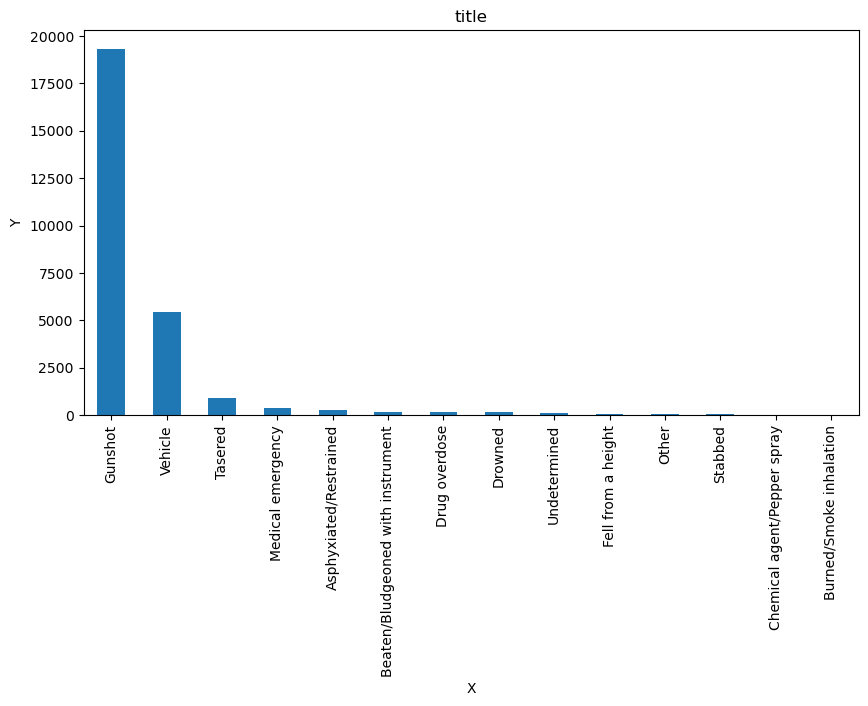

In [45]:
ax = poli['Cause of death'].value_counts().plot(kind='bar',
                                    figsize=(10,5),
                                    title="title")
ax.set_xlabel("X")
ax.set_ylabel("Y")

Text(0, 0.5, 'Y')

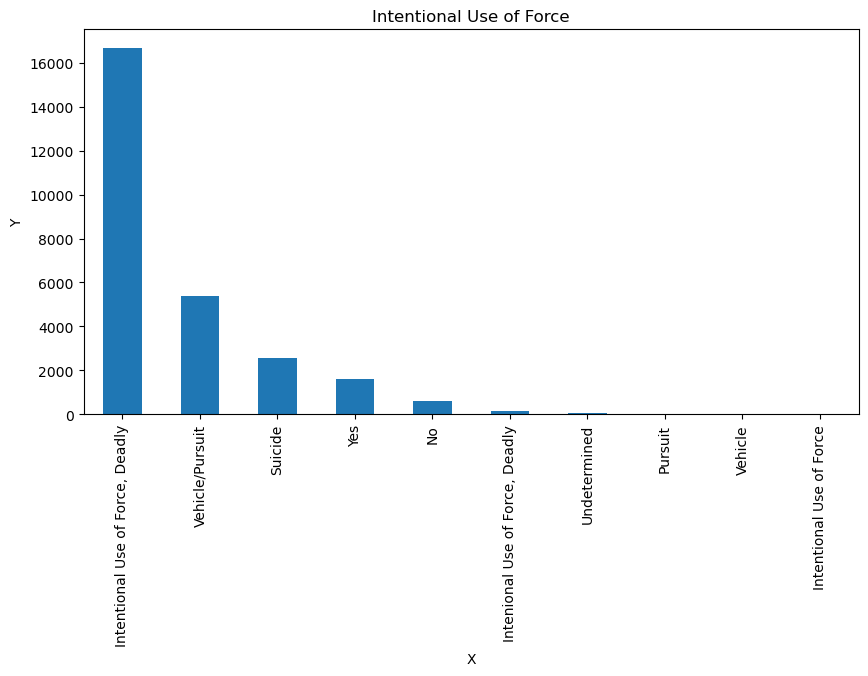

In [55]:
ax = poli['Intentional Use of Force (Developing)'].value_counts().plot(kind='bar',
                                    figsize=(10,5),
                                    title="Intentional Use of Force")
ax.set_xlabel("X")
ax.set_ylabel("Y")

Text(0, 0.5, 'Y')

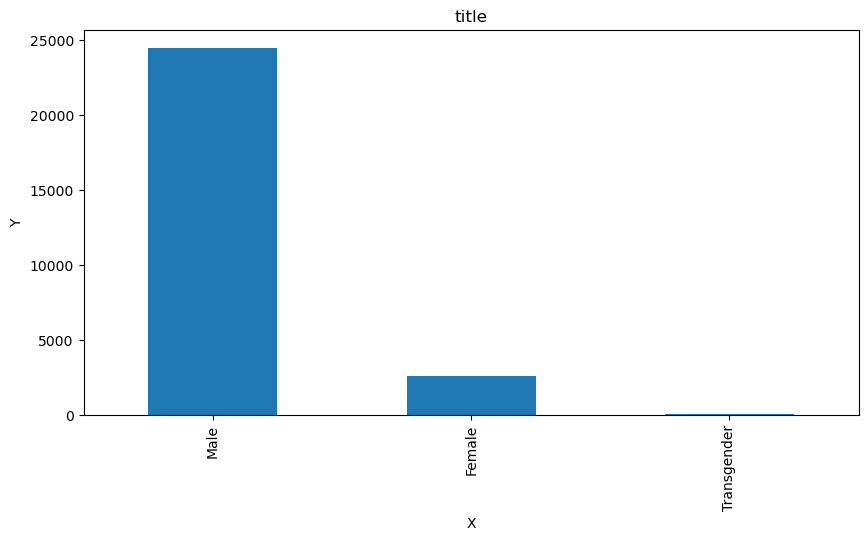

In [47]:
ax = poli["Subject's gender"].value_counts().plot(kind='bar',
                                    figsize=(10,5),
                                    title="title")
ax.set_xlabel("X")
ax.set_ylabel("Y")

Text(0, 0.5, 'Y')

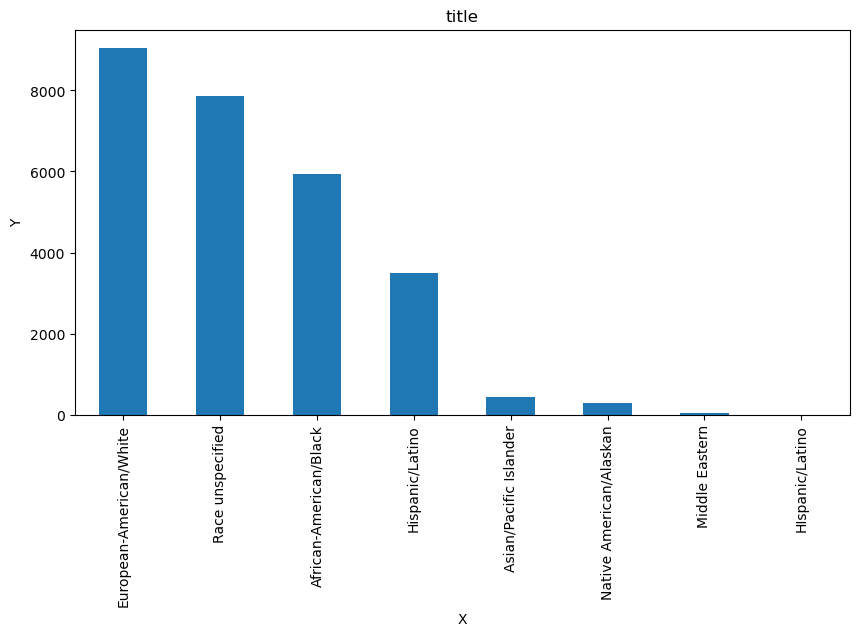

In [48]:
ax = poli["Subject's race"].value_counts().plot(kind='bar',
                                    figsize=(10,5),
                                    title="title")
ax.set_xlabel("X")
ax.set_ylabel("Y")

In [52]:
poli["Subject's age"].unique()

array(['17', '23', '53', '24', '30', '29', '42', '41', '55', '20', '25',
       '22', '19', '28', '31', '36', '35', '26', '68', '16', '49', '27',
       '44', '50', '43', '38', '21', '32', '34', '14', '15', '18', '33',
       '1', '57', '88', '37', '40', '85', '56', '48', '45', '52', '46',
       '63', '74', '60', '59', '51', '69', '10', '13', '39', '47', '66',
       '79', '12', '11', '54', '75', '20s', '6', '7', '5', '3', '72',
       '58', '71', '80', '78', '61', '73', '67', '70', '65', '77', '76',
       '8', '9', '64', '62', '4', '83', '2', '89', '60s', '18-25',
       '18 months', '46/53', '3 months', '40s', '30s', '84', '90', '50s',
       '81', '87', '6 months', '9 months', '10 months', '86', '92',
       '7 months', '82', '8 months', '91', '3 days', '55.', '20s-30s',
       '95', '101', '107', '40-50', '97', '93', '2 months', '4 months',
       '70s'], dtype=object)

Text(0.5, 1.0, 'Housing prices frequencies')

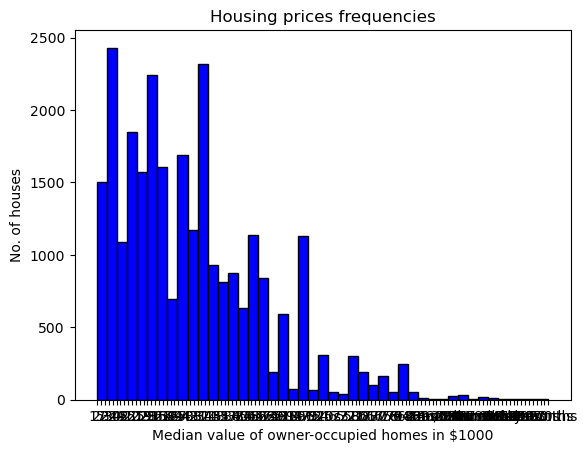

In [51]:
plt.hist(poli["Subject's age"], color='blue', edgecolor='black', bins=int(45/1))
 
plt.xlabel('Median value of owner-occupied homes in $1000')
plt.ylabel('No. of houses')
plt.title('Housing prices frequencies')